# Bitcoin Price Prediction

In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from datetime import datetime

today = date.today()
print("Today's date:", today)

Today's date: 2021-01-04


In [411]:
df = pd.read_csv('bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [412]:
#Print 1024 record value of column btc_market_price
df['btc_market_price'][1023]

13.6888

In [413]:
df['btc_market_price']

0           0.00000
1           0.00000
2           0.00000
3           0.00000
4           0.00000
           ...     
2901    11524.77667
2902    11765.71000
2903    11212.65500
2904    10184.06167
2905    10125.01333
Name: btc_market_price, Length: 2906, dtype: float64

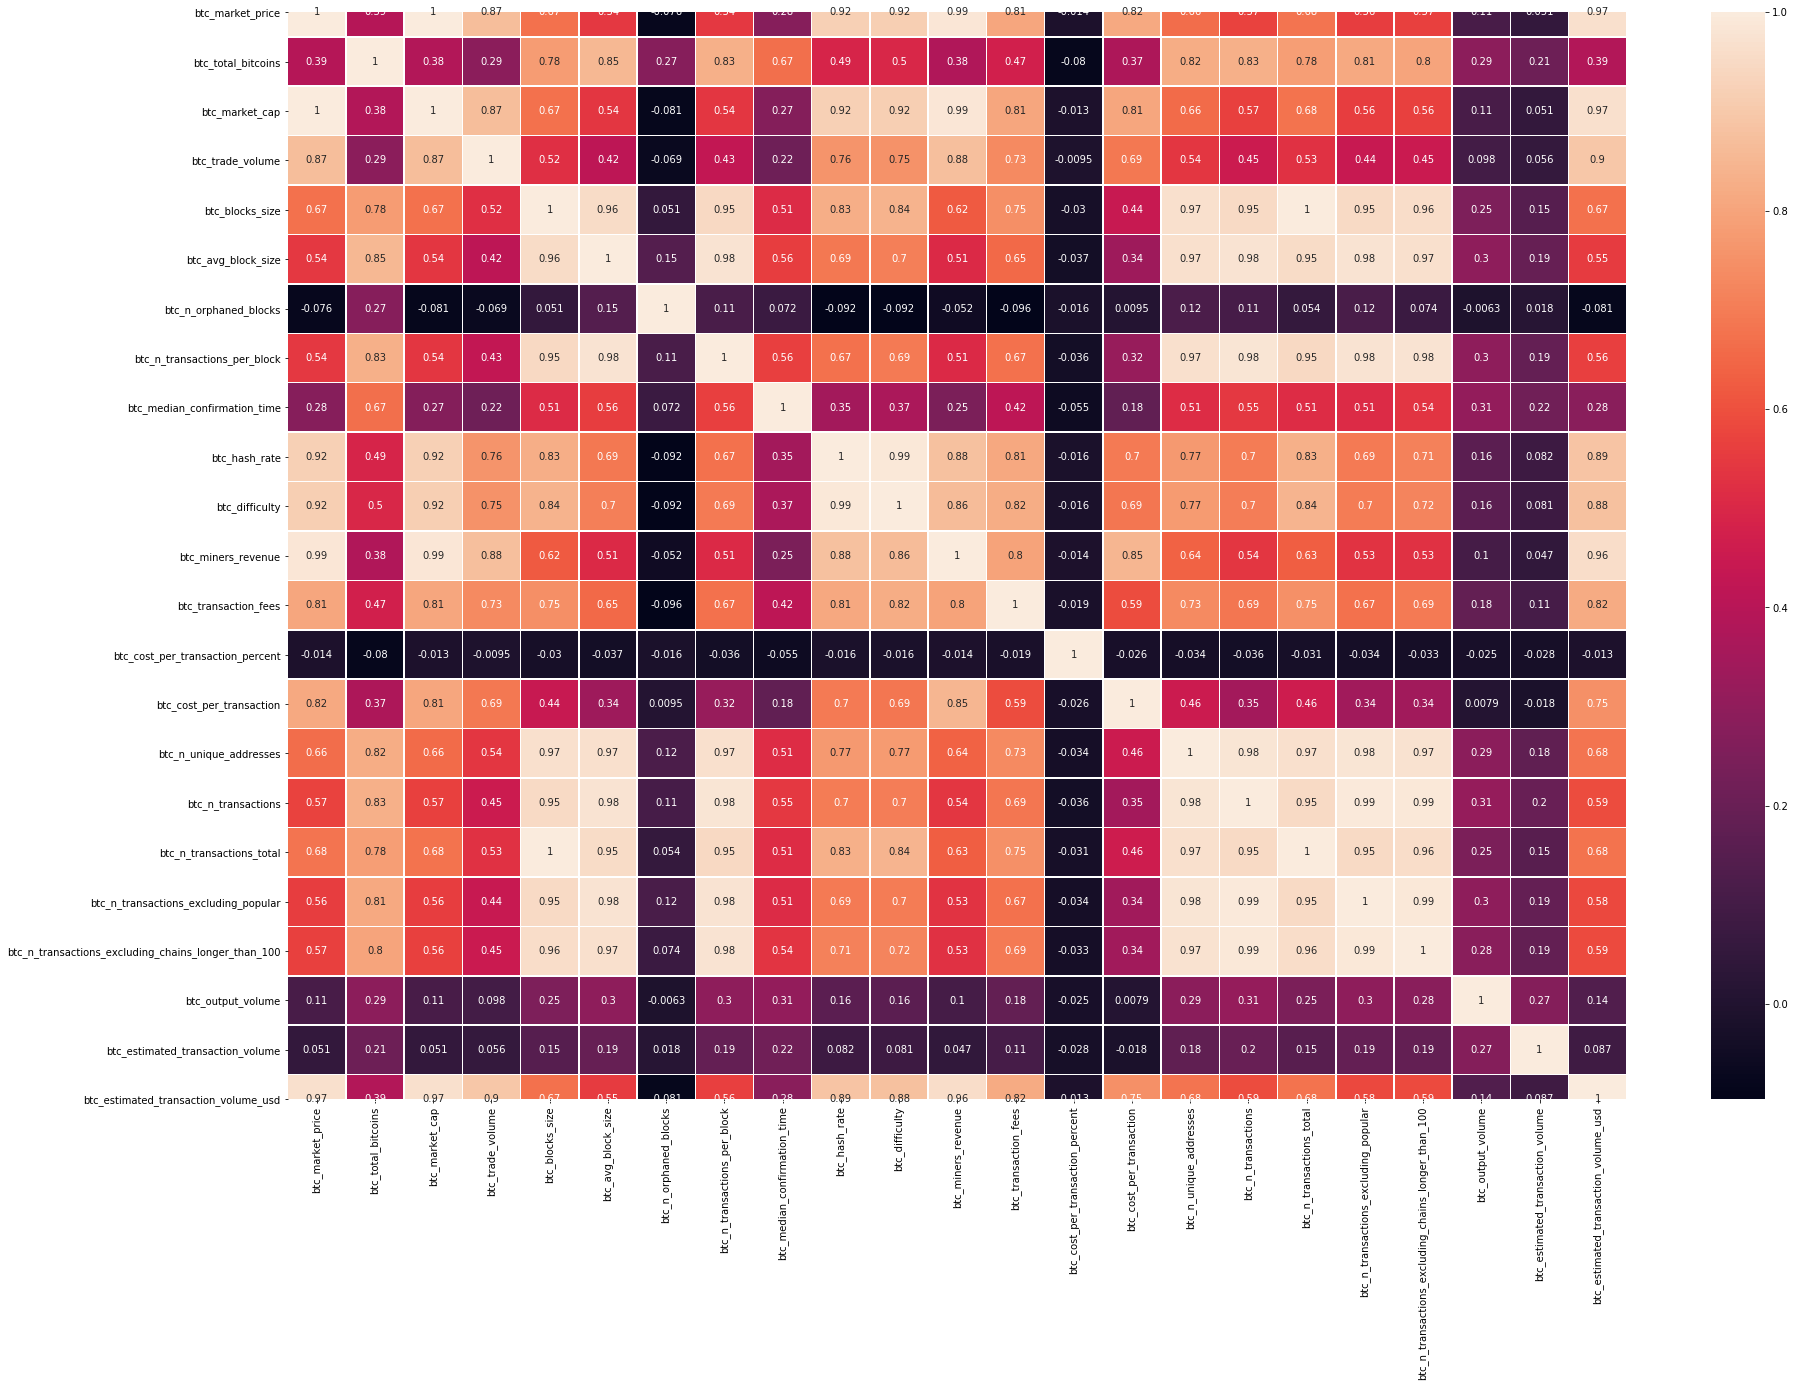

In [414]:
fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

### Data Preparation

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [416]:
df.Date

0       2/17/2010
1       2/18/2010
2       2/19/2010
3       2/20/2010
4       2/21/2010
          ...    
2901    1/27/2018
2902    1/28/2018
2903    1/29/2018
2904    1/30/2018
2905    1/31/2018
Name: Date, Length: 2906, dtype: object

In [417]:
df['Date'] =  pd.to_datetime(df['Date'])

In [418]:
df['now_column'] =pd.to_datetime("now")

In [419]:
df['Days'] = df['now_column']-df['Date']

In [420]:
df['Days'] = df['Days'].dt.days

In [421]:
df['Days'].head()

0    3974
1    3973
2    3972
3    3971
4    3970
Name: Days, dtype: int64

In [422]:
#Remove the 2 columns we have used
df.drop(['now_column', 'Date'], axis=1,inplace=True)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                         2890 non-null float64
btc_miners_revenue                              

In [424]:
#Check amount of data
len(df)

2906

In [425]:
#Check null values
(df.isnull().sum()*100)/len(df)

btc_market_price                                       0.000000
btc_total_bitcoins                                     0.929112
btc_market_cap                                         0.000000
btc_trade_volume                                       0.722643
btc_blocks_size                                        0.997935
btc_avg_block_size                                     0.000000
btc_n_orphaned_blocks                                  0.000000
btc_n_transactions_per_block                           0.000000
btc_median_confirmation_time                           0.412939
btc_hash_rate                                          0.000000
btc_difficulty                                         0.550585
btc_miners_revenue                                     0.000000
btc_transaction_fees                                   0.344116
btc_cost_per_transaction_percent                       0.000000
btc_cost_per_transaction                               0.000000
btc_n_unique_addresses                  

In [426]:
columns_null =['btc_total_bitcoins','btc_trade_volume','btc_blocks_size','btc_median_confirmation_time','btc_difficulty','btc_transaction_fees']

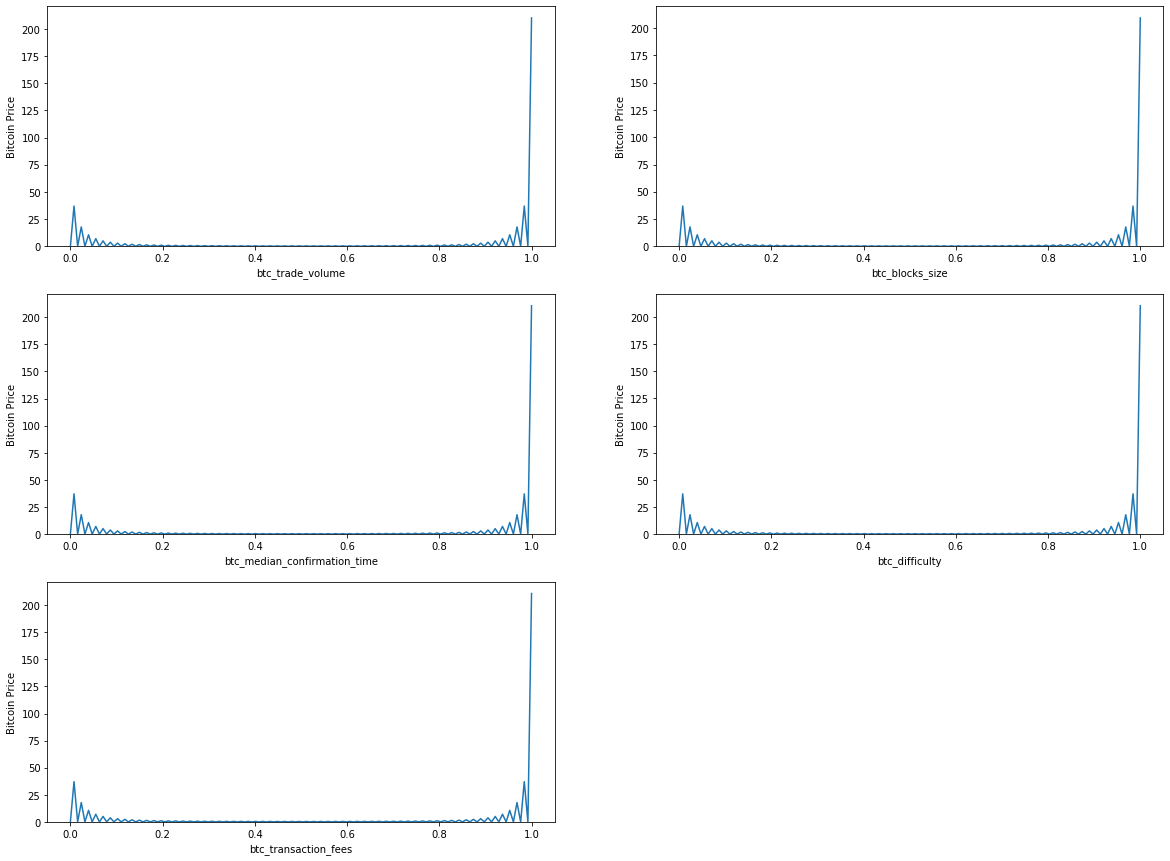

In [427]:
#Plot variation of numerical features w.r.t to SalePrice
plt.figure(figsize=(20,15))
for coll in range(2,7):
    plt.subplot(3,2,coll-1)
    sns.distplot(df[columns_null[coll-1]].notnull(),df["btc_market_price"],hist=False)
    plt.xlabel(columns_null[coll-1])
    plt.ylabel('Bitcoin Price')
plt.show()

In [428]:
#imput nulls with mean
for col in columns_null:
    df[col].fillna(value=df[col].mean(),inplace=True)

In [429]:
#check_nulls
(df.isnull().sum()*100)/len(df)

btc_market_price                                       0.0
btc_total_bitcoins                                     0.0
btc_market_cap                                         0.0
btc_trade_volume                                       0.0
btc_blocks_size                                        0.0
btc_avg_block_size                                     0.0
btc_n_orphaned_blocks                                  0.0
btc_n_transactions_per_block                           0.0
btc_median_confirmation_time                           0.0
btc_hash_rate                                          0.0
btc_difficulty                                         0.0
btc_miners_revenue                                     0.0
btc_transaction_fees                                   0.0
btc_cost_per_transaction_percent                       0.0
btc_cost_per_transaction                               0.0
btc_n_unique_addresses                                 0.0
btc_n_transactions                                     0

## Train Test Split

In [430]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [431]:
df_train.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Days
2884,15126.39833,16794762.5,2.540000e+11,1.634549e+09,150823.4106,1.058195,0,2092.728916,13.700000,1.593555e+07,...,121.715780,876989,347393,291342443,330491,194819,2.162980e+06,259905.1071,3.931428e+09,1090
913,15.26014,9725400.0,1.484110e+08,1.100827e+06,2309.0000,0.111776,0,192.000000,15.616667,1.611846e+01,...,2.920563,41427,38770,6141373,21679,15597,2.627511e+06,270117.0000,4.122022e+06,3061
1043,13.39890,10593200.0,1.419372e+08,2.527817e+05,4163.0000,0.121898,0,203.000000,11.466667,2.412470e+01,...,1.360509,24110,35740,10358476,10482,11877,5.073801e+05,122188.0000,1.637189e+06,2931
288,0.25000,4756550.0,1.189138e+06,4.874935e+03,10.0000,0.000816,0,2.000000,0.000000,7.750287e-02,...,5.111229,586,472,201725,472,370,8.041280e+04,49189.0000,1.229700e+04,3686
2243,417.73000,15412350.0,6.438201e+09,1.251181e+07,64402.0000,0.635034,0,1395.000000,7.033333,1.343666e+06,...,8.227603,375080,207555,121325797,200063,120812,2.534235e+06,241503.0000,1.008829e+08,1731


In [432]:
# Putting response variable to y
y_train = df_train.pop('btc_market_price')

# Putting feature variable to X
X_train = df_train

In [433]:
y_train.head()

2884    15126.39833
913        15.26014
1043       13.39890
288         0.25000
2243      417.73000
Name: btc_market_price, dtype: float64

In [434]:
X_train.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Days
2884,16794762.5,2.540000e+11,1.634549e+09,150823.4106,1.058195,0,2092.728916,13.700000,1.593555e+07,1.930000e+12,...,121.715780,876989,347393,291342443,330491,194819,2.162980e+06,259905.1071,3.931428e+09,1090
913,9725400.0,1.484110e+08,1.100827e+06,2309.0000,0.111776,0,192.000000,15.616667,1.611846e+01,2.190866e+06,...,2.920563,41427,38770,6141373,21679,15597,2.627511e+06,270117.0000,4.122022e+06,3061
1043,10593200.0,1.419372e+08,2.527817e+05,4163.0000,0.121898,0,203.000000,11.466667,2.412470e+01,3.370182e+06,...,1.360509,24110,35740,10358476,10482,11877,5.073801e+05,122188.0000,1.637189e+06,2931
288,4756550.0,1.189138e+06,4.874935e+03,10.0000,0.000816,0,2.000000,0.000000,7.750287e-02,8.078195e+03,...,5.111229,586,472,201725,472,370,8.041280e+04,49189.0000,1.229700e+04,3686
2243,15412350.0,6.438201e+09,1.251181e+07,64402.0000,0.635034,0,1395.000000,7.033333,1.343666e+06,1.670000e+11,...,8.227603,375080,207555,121325797,200063,120812,2.534235e+06,241503.0000,1.008829e+08,1731


In [435]:
from sklearn.linear_model import LinearRegression

In [436]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [437]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

In [438]:
lm.coef_

array([-2.55132462e-06,  5.79455603e-08, -4.82447283e-09, -2.52013213e-04,
       -4.06888933e+01, -1.67206519e-01, -2.80844299e-02,  1.09168562e+00,
       -1.79647753e-05,  2.95265367e-11,  3.66634598e-07, -7.52313046e-02,
        1.49999965e-04,  3.52447807e+00,  1.14738472e-04,  4.14372891e-04,
        5.38435420e-07, -3.34998975e-04,  1.36740419e-04, -4.44832578e-07,
       -1.92836783e-06,  3.17372530e-08, -8.86066639e-03])

In [439]:
lm.intercept_

32.18908441457472

In [440]:
# Putting response variable to y
y_test = df_test.pop('btc_market_price')

# Putting feature variable to X
X_test = df_test

In [441]:
y_pred = lm.predict(X_test)

## Model Evaluation

Text(0, 0.5, 'y_pred')

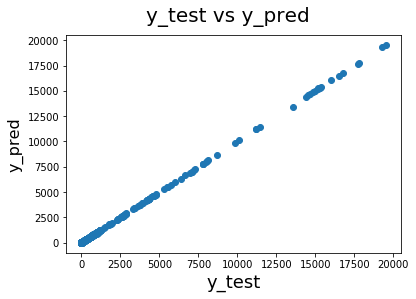

In [442]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [443]:
metrics.mean_squared_error(y_test, y_pred)

337.531122186848